# Paso a paso para desarrollar un modelo 
<br></br>
## 1. Definir el problema y plantear un objetivo
* ¿De qué trata el negocio? ¿Qué problema sería interesante resolver? 
* ¿Cuál es el objetivo que voy a plantear? 
* ¿Cómo voy a saber si el modelo desarrollado valió la pena?
<br></br>
* **Variable target:** definición objetiva y cuantificable (SIN GRISES)
* **Métricas de negocio:** nos ayudan a conocer en números el valor agregado que genera nuestro modelo
<br></br>

## 2. Estructurar dataset 
* ¿Qué datos tengo disponibles?  
* ¿Cómo construyo el target? 
* ¿Puedo incluir información externa?
<br></br>
**Punto de Observación**
Esto se refiere al momento del tiempo en que me estoy posicionando para construir el dataset de entrenamiento:
<br>
* La variable **Target** se calcula al momento del punto de observación o de manera posterior (concepto de "ventana de performance").
* Los **Features** siempre deben calcularse con anteioridad al punto de observación. **SIEMPRE**. Concepto de "ventana de observación".
* **Razonamiento:** Cuando quiera ejecutar una predicción con mi modelo terminado, debo tener disponibles todos los features necesarios, por lo que estos NO pueden usar data del futuro!!!
<br></br>

## 3. Generar features 
* ¿Qué relaciones considero que pueden estar relacionadas con la variable target?  
* ¿Qué transformaciones puedo usar? 
* ¿Qué operaciones algebraicas puedo probar?
<br></br>
**Herramientas y metodologías para generar features**
<br></br>
    * **Joins**: Relacionar información de distintos datasets a partir de claves para obtener más características analizables.
    <br></br>
    * **Transformaciones**: Realizar transformaciones a la variable en si misma puede mejorar la relación con el target. Ejemplo, logaritmo o estandarización. 
    <br></br>
    * **Encoding**: Llevar información categórica a numérica, teniendo en cuenta que la mayor parte de algoritmos de ML requieren que los inputs sean números. 
        1. **One Hot Encoding:** Transformar ciertas categorías en variables binarias (ejemplo, en vez de utilizar el sexo, utilizar la variable "es_mujer"). 
        2. **Label Encoding:** Transformar categorías a números usando un criterio de ordenamiento. 
        3. **Target Encoding:** Reemplazar las categorías con alguna métrica que guarda relación con la variable target (ejemplo, media, mediana, tasa de éxito). <br>
        **Precaución:** La técnica de Target Encoding es muy propensa a sobreajuste si no se la usa de manera controlada. Asegurarse: <br>
            * Que cada categoría cuente con suficiente volúmen de datos para que la medida resumen sea significativa. <br>
            * Que las medidas resúmen se calculen únicamente usando data de train para no "mentirle" a la muestra de test. 
 
 * **PCA**: Calcular un grupo de componentes de ciertas variables que se encuentren muy correlacionadas entre si, para evitar problemas de multicolinealidad. 
  <br></br>
 * **Clustering**: Generar grupos en función a las similitudes entre sí en función a ciertas variables, y utilizarlas como nuevas categorías para segmentar o para generar features. 
  <br></br>
 * **Predicciones de otro modelo**: Generar predicciones con alguna otra metodología y utilizar ese resultado como nuevo input. Ejemplo, generar un árbol de decisión con ciertas variables que c 
<br></br>
<br></br>

**Técnicas para ordenar features de acuerdo a su poder predictivo**
<br></br>
    * **Correlación con el target**: Sirve cuando el target es numérico y las features son numéricas.<br>
    * **Information Value**: Sirve cuando el target es bineario y las features son categóricas.<br>
    * **Imprtancia de variables**: Utilizando el algoritmo de Random Forest podemos acceder a una métrica calculada por éste, llamada importancia, que sirve para determinar la contribución relativa de cada característica en la precisión de las predicciones del modelo. . Sirve para features numéricas y target binario o numérico. <br>

<br></br>

## 4. Elegir algoritmo y entrenar 
* ¿Qué tipo de algoritmo debo utilizar? ¿Es aprendizaje supervisado?  
* ¿Es un modelo de clasificación o regresión? 
* ¿Necesito contar con interpretación de coeficientes para el negocio?
<br></br>
**Algoritmos ya vistos**
<br></br>
 * **Clasificación**: Variable respuesta binaria<br>
        1. **Árboles de decsión:** Cada nodo tiene asociada una probabilidad de éxito.  
        2. **Regresión logística:** Cada registro tendrá su propia predicción de probabilidad de éxito. Es interpretable, cuenta con coeficientes a estimar. 
   
 <br></br>
 * **Regresión**: Variable respuesta numérica<br>
        1. **Árboles de decsión:** Se puede calcular alguna medida estadística para cada nodo, ejemplo, media o mediana, y esa será la predicción.  
        2. **Regresión lineal:** Cada registro tendrá su propia predicción. Es interpretable, cuenta con coeficientes a estimar. 
 <br></br>

## 5. Métricas de validación
* ¿Cómo sé si un modelo es bueno o no? 
* ¿Cómo comparo modelos entre sí? 
<br></br>
**Métricas ya vistas**
<br></br>
 * **Clasificación**: <br>
        1. **Matriz de Confusión:** Para hacerla tenemos que tener predicción binaria (definir un umbral de corte).  
        2. **Métricas que surgen de la matriz de confusión:** Accurancy, Recall, Precission, Especificity, F1-Score. En general, más cerca del 100%, mejor modelo.    
        3. **Curva ROC y AUC:** Cuanto mayor AUC, mejor modelo.     
 <br></br>
 * **Regresión**: <br>
        1. **R Cuadrado:** Cuuanto más cerca de 1, mejor es el modelo.  
        2. **Error cuadrático medio:** Cuanto más cercano a cero, mejor es el modelo. 


## 6. Selección de modelo e implementación
* ¿Qué modelo obtiene mejor poder predictivo? ¿Responde a las necesidades del negocio?
* ¿Cómo voy a entregar los resultados de mis predicciones en el futuro? 

<br></br>


# Veamos un ejemplo 
## Intentando predecir el precio de una acción dentro de un mes

# OBJETIVO: Predecir la probabilidad de que el precio de una acción de Galicia suba en al menos un 3% dentro de una semana

<br> <br/>
### Contexto comercial 
Soy un inversionista que quiere tener una ganancia de al menos un 3% respecto de su inversión inicial, a la semana siguiente. Estoy evaluando comprar acciones del Banco Galicia, y quiero saber si existe probabilidad de que la acción valga un 3% más la próxima semana. 
<br> <br/>
### Problema comercial
Para tomar la decisión sobre comprar o no acciones del Banco Galicia es necesario contar con una probabilidad de aumento de al menos un 3% del valor de la misma.
<br> <br/>
### Contexto analítico 
Para poder desarrollar el modelo se cuenta con la siguiente información:
<br> <br/>
* **Acciones Banco Galicia:** Historial de precios de apertura (Open), cierre (Close), máximo y mínimo precio del día (High y Low respectivamente), precio de cierre ajustado después de los ajustes para todas las distribuciones de splits y dividendos aplicables (Adj Close) y el total de acciones negiciadas durante el día (Volume). Periodo abarcado: 25/01/2017 a 22/09/2023. 
* **Acciones Banco Santander:** Historial de precios de apertura (Open), cierre (Close), máximo y mínimo precio del día (High y Low respectivamente), precio de cierre ajustado después de los ajustes para todas las distribuciones de splits y dividendos aplicables (Adj Close) y el total de acciones negiciadas durante el día (Volume). Periodo abarcado: 25/01/2017 a 22/09/2023. 
<br> <br/>

## Descargar la data
<br>
Para hacerlo, usé la página de Yahoo Finanzas, busqué dos empresas que me interesaban analizar, y descargué el historial diario de precios y volúmenes del último año. <br>
<br>
En este caso, vamos a vincular el precio de acciones de Banco Santander y Banco Galicia. <br>
<br>
Página de descarga: 
<br>
https://es.finance.yahoo.com/quote/SAN.MC/history?p=SAN.MC
<br>

In [1]:
# Importación de librerías usuales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Libreria para métricas
import scipy 
# Importo libreria para trabajar con dates 
from datetime import timedelta
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Librerías para arboles de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Librería para PCA
from sklearn.decomposition import PCA
# Libreria para KMeans
from sklearn.cluster import KMeans
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Librería para RandomForest
from sklearn.ensemble import RandomForestClassifier
# Librería para accurancy
from sklearn.metrics import accuracy_score
# Librería matriz de confusión
from sklearn.metrics import confusion_matrix
# Librería para curva de ROC
from sklearn.metrics import roc_curve, auc
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

In [2]:
# Levanto la data descargada 
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/GGAL.csv'
galicia = pd.read_csv(url, sep = ',')

url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/SAN.MC.csv'
santander = pd.read_csv(url, sep = ',')

galicia['Date'] = pd.to_datetime(galicia['Date'])
santander['Date'] = pd.to_datetime(santander['Date'])

In [3]:
galicia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-25,33.060001,33.259998,31.760000,32.75,27.493952,640300
1,2017-01-26,32.509998,32.959999,31.780001,31.90,26.780361,197900
2,2017-01-27,31.639999,31.889999,31.059999,31.34,26.310238,299400
3,2017-01-30,30.920000,31.150000,30.660000,30.84,25.890488,284800
4,2017-01-31,30.610001,31.240000,30.610001,31.07,26.083569,446800


In [4]:
santander.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,4.638409,4.707217,4.636524,4.703447,3.601206,20481554.0
1,2017-01-03,4.712873,4.880651,4.709103,4.817499,3.688530,63383417.0
2,2017-01-04,4.838235,4.885364,4.789221,4.839178,3.705129,63903436.0
3,2017-01-05,4.829752,4.891962,4.802417,4.853316,3.715955,52036072.0
4,2017-01-06,4.840120,4.881594,4.811843,4.880651,3.736883,29360034.0


# Definir qué estructura necesito 
<br>
Para construir un dataset analizable apuntando al objetivo para el cual estoy estudiando la data, primero necesito definir de manera concreta y objetiva qué quisiera hacer en este dataset. 
<br>
<br>

**Objetivo:** Predicir cuál será la probabilidad de que el precio de la acción de galicia aumente al menos un 3% en la próxima semana. 
<br>

**Variable Target:** Variable binaria que indica un 1 si el precio de la acción del Banco Galicia dentro de 7 días es al menos un 3% superior respecto del momento de evaluación, 0 en otro caso. 
<br>

**Features:** Información relacionada al historial de precios tanto del Banco Galicia como del Banco Santander. 
<br>
<br>
#### Ejemplo puntual de cómo construir un renglón:
<br>

Si me paro en el 17/09/2023: 
<br>
1- El precio de la acción del Banco Galicia el 23/09/2023 será información para la variable target (7 días después del punto de observación). 
<br>
2- El historial de precios y volúmenes antes del 17/09/2023 será información disponible para construir features 
<br>
<br>

**Entonces:** Muy importante conocer el concepto de **Punto de Observación**. 
Esto se refiere al momento del tiempo en que me estoy posicionando para construir el dataset de entrenamiento:

<br>

* La variable **Target** se calcula al momento del punto de observación o de manera posterior.
* Los **Features** siempre deben calcularse con anteioridad al punto de observación. **SIEMPRE**.

<br>

In [5]:
# Creo mi variable target 
df = pd.DataFrame(galicia[['Date','Close']])
df.rename(columns={'Date': 'Date_Target','Close': 'Close_Target'}, inplace=True)
df.head()

,Date_Target,Close_Target
0,2017-01-25,32.75
1,2017-01-26,31.90
2,2017-01-27,31.34
3,2017-01-30,30.84
4,2017-01-31,31.07


## Algunas definiciones: 
* Para calcular features voy a jugar con el último mes de historia. Por lo que necesito estudiar con al menos 30 días de precios históricos. Dado que la fecha más antigua de ambos datasets es 2017-01-25, voy a quedarme únicamente con targets a partir del 2017-03-01
* Para calcular el target, me traigo el precio de hace una semana y calculo la variación. Si esta supera el 3% identifico con un 1 a la fecha. Sino, con un 0. 

In [6]:
# Exclusión target demasiado antiguo 
df = df.loc[df['Date_Target'] >= '2017-03-01',]

In [7]:
# Cálculo del target 

# Transformo en tipo de dato "datetime" y calculo la fecha de observación de hace 7 dias
df['Date_Target'] = pd.to_datetime(df['Date_Target'])
df['Date_Obs'] = df['Date_Target'] - pd.DateOffset(days=7)

# Definir el margen de tiempo de - 3 días (para tener en cuenta fines de semana)
margen = timedelta(days = 3)

# Realizar la unión basada en el margen de tiempo
df = pd.merge_asof(df, galicia[['Date','Close','Open']], 
                          left_on = 'Date_Obs',  
                          right_on = 'Date', 
                          direction = 'backward', 
                          tolerance = margen)

# Renonmbro y printeo
df = df.drop(columns='Date')
df.rename(columns={'Close': 'Close_Obs','Open': 'Open_Obs'}, inplace=True)
df.head(100)

,Date_Target,Close_Target,Date_Obs,Close_Obs,Open_Obs
0,2017-03-01,32.910000,2017-02-22,34.820000,34.700001
1,2017-03-02,32.570000,2017-02-23,33.599998,35.000000
2,2017-03-03,33.619999,2017-02-24,32.570000,33.299999
3,2017-03-06,33.200001,2017-02-27,32.299999,32.400002
4,2017-03-07,33.000000,2017-02-28,31.799999,32.110001
...,...,...,...,...,...
95,2017-07-17,39.959999,2017-07-10,42.230000,41.580002
96,2017-07-18,37.730000,2017-07-11,42.200001,42.439999
97,2017-07-19,38.799999,2017-07-12,42.680000,42.330002
98,2017-07-20,38.669998,2017-07-13,41.689999,42.639999


In [8]:
# Termino de generar mi variable target 
df['Target'] = np.where(df['Close_Target'] >= (df['Close_Obs'] * 1.03),1,0)
df['Target'].value_counts()

0    1095
1     558
Name: Target, dtype: int64

In [9]:
# Hay vacíos? 
df['Target'].isnull().sum()

0

# Creación de Features
Acá es donde tenemos que darle rienda suelta a nuestra creatividad. ¿Qué se nos ocurre que sería un buen indicador sobre la probabilidad de que el precio de la acción aumente? 

In [53]:
# Empiezo con la construcción!

######## VARIACIONES
margen = timedelta(days = 4)

#### 15 DIAS ANTES

# Primero me genero una columna que indique la fecha 7 días antes del punto de observación 
df['Date_15dAntes'] = df['Date_Obs'] - pd.DateOffset(days=15)


# GALICIA: 
# Realizar la unión basada en el margen de tiempo
df = pd.merge_asof(df, galicia[['Date','Close']], 
                          left_on = 'Date_15dAntes',  
                          right_on = 'Date', 
                          direction = 'backward', 
                          tolerance = margen)
df.drop('Date', axis=1, inplace=True)

# Renonmbro 
df.rename(columns={'Close': 'Close_15dAntes'}, inplace=True)

# Luego construyo efectivamente la variable que quería construir 
df['Var_15d'] = (df['Close_Obs'] / df['Close_15dAntes']) -1

# SANTANDER: 
# Primero me traigo el precio de la acción de Santander al momento del análisis
df = pd.merge_asof(df, santander[['Date','Close']], 
                          left_on = 'Date_Obs',  
                          right_on = 'Date', 
                          direction = 'backward', 
                          tolerance = margen)
df.drop('Date', axis=1, inplace=True)
df.rename(columns={'Close': 'Close_Obs_Santander'}, inplace=True)

# Realizar la unión basada en el margen de tiempo
df = pd.merge_asof(df, santander[['Date','Close']], 
                          left_on = 'Date_15dAntes',  
                          right_on = 'Date', 
                          direction = 'backward', 
                          tolerance = margen)
df.drop('Date', axis=1, inplace=True)

# Renonmbro features
df.rename(columns={'Close': 'Close_15dAntes_Santander'}, inplace=True)

# Luego construyo efectivamente la variable que quería construir 
df['Var_15d_Santander'] = (df['Close_Obs_Santander'] / df['Close_15dAntes_Santander']) -1


#### 7 DIAS ANTES

# Primero me genero una columna que indique la fecha 7 días antes del punto de observación 
df['Date_7dAntes'] = df['Date_Obs'] - pd.DateOffset(days=7)

# Realizar la unión basada en el margen de tiempo
df = pd.merge_asof(df, galicia[['Date','Close']], 
                          left_on = 'Date_7dAntes',  
                          right_on = 'Date', 
                          direction = 'backward', 
                          tolerance = margen)
df.drop('Date', axis=1, inplace=True)

# Renonmbro 
df.rename(columns={'Close': 'Close_7dAntes'}, inplace=True)

# Luego construyo efectivamente la variable que quería construir 
df['Var_7d'] = (df['Close_Obs'] / df['Close_7dAntes']) -1

# SANTANDER: 
# Realizar la unión basada en el margen de tiempo
df = pd.merge_asof(df, santander[['Date','Close']], 
                          left_on = 'Date_7dAntes',  
                          right_on = 'Date', 
                          direction = 'backward', 
                          tolerance = margen)
df.drop('Date', axis=1, inplace=True)

# Renonmbro features
df.rename(columns={'Close': 'Close_7dAntes_Santander'}, inplace=True)

# Luego construyo efectivamente la variable que quería construir 
df['Var_7d_Santander'] = (df['Close_Obs_Santander'] / df['Close_7dAntes_Santander']) -1


#### 3 DIAS ANTES

# Primero me genero una columna que indique la fecha 3 días antes del punto de observación 
df['Date_3dAntes'] = df['Date_Obs'] - pd.DateOffset(days=3)

# Realizar la unión basada en el margen de tiempo
df = pd.merge_asof(df, galicia[['Date','Close']], 
                          left_on = 'Date_3dAntes',  
                          right_on = 'Date', 
                          direction = 'backward', 
                          tolerance = margen)
df.drop('Date', axis=1, inplace=True)

# Renonmbro 
df.rename(columns={'Close': 'Close_3dAntes'}, inplace=True)

# Luego construyo efectivamente la variable que quería construir 
df['Var_3d'] = (df['Close_Obs'] / df['Close_3dAntes']) -1

# SANTANDER: 
# Realizar la unión basada en el margen de tiempo
df = pd.merge_asof(df, santander[['Date','Close']], 
                          left_on = 'Date_3dAntes',  
                          right_on = 'Date', 
                          direction = 'backward', 
                          tolerance = margen)
df.drop('Date', axis=1, inplace=True)

# Renonmbro features
df.rename(columns={'Close': 'Close_3dAntes_Santander'}, inplace=True)

# Luego construyo efectivamente la variable que quería construir 
df['Var_3d_Santander'] = (df['Close_Obs_Santander'] / df['Close_3dAntes_Santander']) -1

#### 1 DIA ANTES

# Primero me genero una columna que indique la fecha 3 días antes del punto de observación 
df['Date_1dAntes'] = df['Date_Obs'] - pd.DateOffset(days=1)

# Realizar la unión basada en el margen de tiempo
df = pd.merge_asof(df, galicia[['Date','Close']], 
                          left_on = 'Date_1dAntes',  
                          right_on = 'Date', 
                          direction = 'backward', 
                          tolerance = margen)
df.drop('Date', axis=1, inplace=True)

# Renonmbro 
df.rename(columns={'Close': 'Close_1dAntes'}, inplace=True)

# Luego construyo efectivamente la variable que quería construir 
df['Var_1d'] = (df['Close_Obs'] / df['Close_1dAntes']) -1

# SANTANDER: 
# Realizar la unión basada en el margen de tiempo
df = pd.merge_asof(df, santander[['Date','Close']], 
                          left_on = 'Date_1dAntes',  
                          right_on = 'Date', 
                          direction = 'backward', 
                          tolerance = margen)
df.drop('Date', axis=1, inplace=True)

# Renonmbro features
df.rename(columns={'Close': 'Close_1dAntes_Santander'}, inplace=True)

# Luego construyo efectivamente la variable que quería construir 
df['Var_1d_Santander'] = (df['Close_Obs_Santander'] / df['Close_1dAntes_Santander']) -1


#### RELACION PRECIOS SANTANDER Y GALICIA 
df['Rel_Precio_SantGal_Obs'] = df['Close_Obs'] / df['Close_Obs_Santander']
df['Rel_Precio_SantGal_1d'] = df['Close_1dAntes'] / df['Close_1dAntes_Santander']
df['Rel_Precio_SantGal_3d'] = df['Close_3dAntes'] / df['Close_3dAntes_Santander']
df['Rel_Precio_SantGal_7d'] = df['Close_7dAntes'] / df['Close_7dAntes_Santander']
df['Rel_Precio_SantGal_15d'] = df['Close_15dAntes'] / df['Close_15dAntes_Santander']


#### VARIACION DE LA RELACION PRECIOS SANTANDER Y GALICIA 
df['Var_Precio_SantGal_1d'] = (df['Rel_Precio_SantGal_Obs'] / df['Rel_Precio_SantGal_1d']) - 1
df['Var_Precio_SantGal_3d'] = (df['Rel_Precio_SantGal_Obs'] / df['Rel_Precio_SantGal_3d']) - 1
df['Var_Precio_SantGal_7d'] = (df['Rel_Precio_SantGal_Obs'] / df['Rel_Precio_SantGal_7d']) - 1
df['Var_Precio_SantGal_15d'] = (df['Rel_Precio_SantGal_Obs'] / df['Rel_Precio_SantGal_15d']) - 1

#### COMPOSICION DE LA FECHA 
df['Year'] = df['Date_Obs'].dt.year
df['Mes'] = df['Date_Obs'].dt.month
df['Dia'] = df['Date_Obs'].dt.day
df['Dia_Semana'] = df['Date_Obs'].dt.weekday #((lunes = 0, domingo = 6))
# Trimestre
bin_edges = [0, 3, 6, 9, 12]
bin_labels = ['Trimestre 1','Trimestre 2','Trimestre 3', 'Trimestre 4']
df['Trimestre'] = pd.cut(df['Mes'], 
                                  bins = bin_edges, 
                                  labels = bin_labels, 
                                  include_lowest = True)
# Dias de a 5 en 5
bin_edges = [0, 5, 10, 15, 20, 25, 9999]
bin_labels = ['1 - 5','6 - 10','11 - 15', '16 - 20', '21 - 25', '26 - 31']
df['Dia_5'] = pd.cut(df['Dia'], 
                                  bins = bin_edges, 
                                  labels = bin_labels, 
                                  include_lowest = True)

TypeError: '<' not supported between instances of 'str' and 'int'

In [11]:
df.head()

,Date_Target,Close_Target,Date_Obs,Close_Obs,Open_Obs,Target,Date_15dAntes,Close_15dAntes,Var_15d,Close_Obs_Santander,...,Var_Precio_SantGal_1d,Var_Precio_SantGal_3d,Var_Precio_SantGal_7d,Var_Precio_SantGal_15d,Year,Mes,Dia,Dia_Semana,Trimestre,Dia_5
0,2017-03-01,32.910000,2017-02-22,34.820000,34.700001,0,2017-02-07,33.220001,0.048164,4.809958,...,0.023122,0.013070,0.021670,0.051245,2017,2,22,2,Trimestre 1,21 - 25
1,2017-03-02,32.570000,2017-02-23,33.599998,35.000000,0,2017-02-08,34.419998,-0.023823,4.822211,...,-0.037489,-0.020546,-0.001528,-0.036989,2017,2,23,3,Trimestre 1,21 - 25
2,2017-03-03,33.619999,2017-02-24,32.570000,33.299999,1,2017-02-09,35.299999,-0.077337,4.759059,...,-0.017792,-0.032755,-0.042258,-0.063083,2017,2,24,4,Trimestre 1,21 - 25
3,2017-03-06,33.200001,2017-02-27,32.299999,32.400002,0,2017-02-12,35.669998,-0.094477,4.766600,...,-0.009859,-0.009859,-0.047457,-0.097342,2017,2,27,0,Trimestre 1,26 - 31
4,2017-03-07,33.000000,2017-02-28,31.799999,32.110001,1,2017-02-13,34.490002,-0.077994,4.858029,...,-0.034009,-0.043532,-0.074861,-0.082108,2017,2,28,1,Trimestre 1,26 - 31


# Diccionario de features 
1. **Close_Obs:** Precio de cierre del momento de observación 
2. **Open_Obs:** Precio de apertura del momento de observación 
3. **Close_15dAntes:** Precio de cierre 15 días antes del momento de observación 
4. **Var_15d:** Variación entre Precio de cierre del momento de observación y 15 días antes
5. **Close_Obs_Santander:** Precio de cierre de Santander del momento de observación 
6. **Close_15dAntes_Santander:** Precio de cierre de Santander 15 días antes del momento de observación 
7. **Var_15d_Santander:** Variación entre Precio de cierre de Santander del momento de observación y 15 días antes
8. **Close_7dAntes:** Precio de cierre 7 días antes del momento de observación 
9. **Var_7d:** Variación entre Precio de cierre del momento de observación y 7 días antes
10. **Close_7dAntes_Santander:** Precio de cierre de Santander 7 días antes del momento de observación  
11. **Var_7d_Santander:** Variación entre Precio de cierre de Santander del momento de observación y 7 días antes
12. **Close_3dAntes:** Precio de cierre 3 días antes del momento de observación 
13. **Var_3d:** Variación entre Precio de cierre del momento de observación y 3días antes
14. **Close_3dAntes_Santander:** Precio de cierre de Santander 3 días antes del momento de observación  
15. **Var_3d_Santander:** Variación entre Precio de cierre de Santander del momento de observación y 3 días antes
16. **Close_1dAntes:** Precio de cierre 1 día antes del momento de observación 
17. **Var_1d:** Variación entre Precio de cierre del momento de observación y 1 día antes
18. **Close_1dAntes_Santander:** Precio de cierre de Santander 1 día antes del momento de observación  
19. **Var_1d_Santander:** Variación entre Precio de cierre de Santander del momento de observación y 1 día antes
20. **Rel_Precio_SantGal_Obs:** Cociente entre precio de cierre del momento de observación de Santander y Galicia
21. **Rel_Precio_SantGal_1d:** Cociente entre precio de cierre del 1 día antes del momento de observación de Santander y Galicia
22. **Rel_Precio_SantGal_3d:** Cociente entre precio de cierre del 3 días antes del momento de observación de Santander y Galicia
23. **Rel_Precio_SantGal_7d:** Cociente entre precio de cierre del 7 días antes del momento de observación de Santander y Galicia
24. **Rel_Precio_SantGal_15d:** Cociente entre precio de cierre del 15días antes del momento de observación de Santander y Galicia 
25. **Var_Precio_SantGal_1d:** Variación en la relación de precios entre Galicia y Santander entre el momento de observación y hace 1 día
26. **Var_Precio_SantGal_3d:** Variación en la relación de precios entre Galicia y Santander entre el momento de observación y hace 3 días
27. **Var_Precio_SantGal_7d:** Variación en la relación de precios entre Galicia y Santander entre el momento de observación y hace 7 días
28. **Var_Precio_SantGal_15d:** Variación en la relación de precios entre Galicia y Santander entre el momento de observación y hace 15 días
29. **Mes:** Mes de análisis
30. **Dia:** Día del mes de análisis
31. **Dia_Semana:** Día de semana de análisis
32. **Trimestre:** Trimestre de análisis
33. **Dia_5:** Día del mes, clasificado de a grupos de a 5 días

# EDA

## Valores vacíos

In [54]:
df.isnull().sum()

index                       0
Date_Target                 0
Close_Target                0
Date_Obs                    0
Close_Obs                   0
Open_Obs                    0
Target                      0
Date_15dAntes               0
Close_15dAntes              0
Var_15d                     0
Close_Obs_Santander         0
Close_15dAntes_Santander    0
Var_15d_Santander           0
Date_7dAntes                0
Close_7dAntes               0
Var_7d                      0
Close_7dAntes_Santander     0
Var_7d_Santander            0
Date_3dAntes                0
Close_3dAntes               0
Var_3d                      0
Close_3dAntes_Santander     0
Var_3d_Santander            0
Date_1dAntes                0
Close_1dAntes               0
Var_1d                      0
Close_1dAntes_Santander     0
Var_1d_Santander            0
Rel_Precio_SantGal_Obs      0
Rel_Precio_SantGal_1d       0
Rel_Precio_SantGal_3d       0
Rel_Precio_SantGal_7d       0
Rel_Precio_SantGal_15d      0
Var_Precio

In [13]:
# Opto por eliminar los vacíos, ya que son pocos casos y deben ser por faltante de información
df = df.dropna()
df = df.reset_index()

In [14]:
df.shape

(1649, 43)

## Variable target
Como ya describimos inicialmente, nuestra variable target indica si la acción del Banco Galicia aumentó en al menos un 3% de una semana a la otra. Identifiquemos en qué proporción de los días estudiados ocurrió eso. 

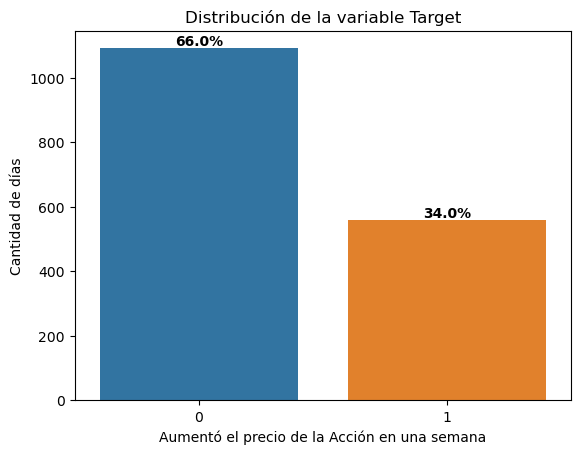

In [15]:
# Analicemos la distribución de nuestra variable target
cantidad = len(df['Target'])

sns.countplot(data = df,
              x = "Target")
plt.xlabel('Aumentó el precio de la Acción en una semana')
plt.ylabel('Cantidad de días')
plt.title('Distribución de la variable Target')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Tasa de aumento por año')

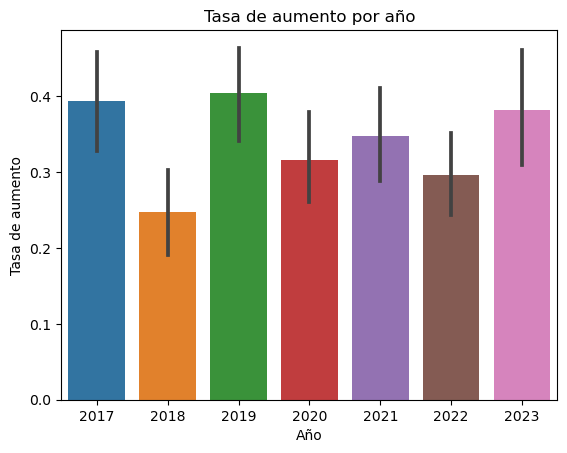

In [16]:
# Y por año? 
sns.barplot(data = df,
                x = 'Year',
                y = 'Target')
plt.xlabel('Año')
plt.ylabel('Tasa de aumento')
plt.title('Tasa de aumento por año')

# Importancia de los Features 
Exploremos la metodología de utilizar el algoritmo de Ranfom Forest para cuantificar la importancia de las variables. 

In [17]:
from sklearn.ensemble import RandomForestClassifier

features = ['Var_15d','Var_15d_Santander','Var_7d','Var_7d_Santander','Var_3d','Var_3d_Santander',
           'Var_1d','Var_1d_Santander', 'Rel_Precio_SantGal_Obs',
       'Rel_Precio_SantGal_1d', 'Rel_Precio_SantGal_3d',
       'Rel_Precio_SantGal_7d', 'Rel_Precio_SantGal_15d',
       'Var_Precio_SantGal_1d', 'Var_Precio_SantGal_3d',
       'Var_Precio_SantGal_7d', 'Var_Precio_SantGal_15d','Mes','Dia','Dia_Semana']

X = df[features].values
y = df['Target'].values

# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators = 150, 
                               random_state = 123,
                               max_depth = 5,
                               min_samples_leaf = 100,
                               max_features = 6,
                               criterion = 'entropy') 

# Entrenar el modelo
model.fit(X, y)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df.sort_values(by = 'Importance', ascending = False)

,Feature,Importance
12,Rel_Precio_SantGal_15d,0.130889
11,Rel_Precio_SantGal_7d,0.100379
10,Rel_Precio_SantGal_3d,0.080075
18,Dia,0.077234
3,Var_7d_Santander,0.064162
9,Rel_Precio_SantGal_1d,0.053075
16,Var_Precio_SantGal_15d,0.049641
6,Var_1d,0.048726
8,Rel_Precio_SantGal_Obs,0.044337
1,Var_15d_Santander,0.043590


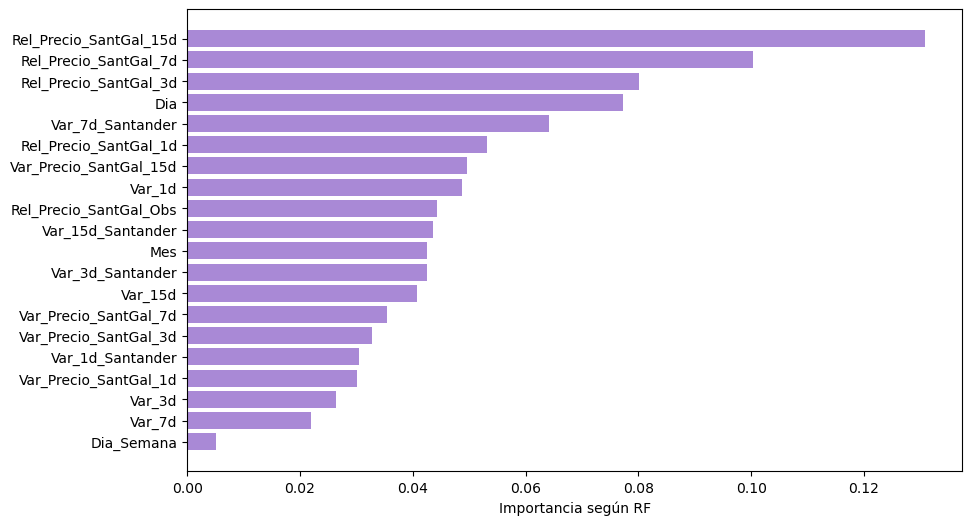

In [18]:
# Grafico la importancia de cada variable
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(importance_df['Feature'], 
         importance_df['Importance'],
         color = '#A989D6')
plt.xlabel('Importancia según RF')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show() 

# Interpretemos estas relaciones

## ¿Cómo son las relaciones de todas contra todas, aperturadas por el target? 

<Figure size 768x576 with 0 Axes>

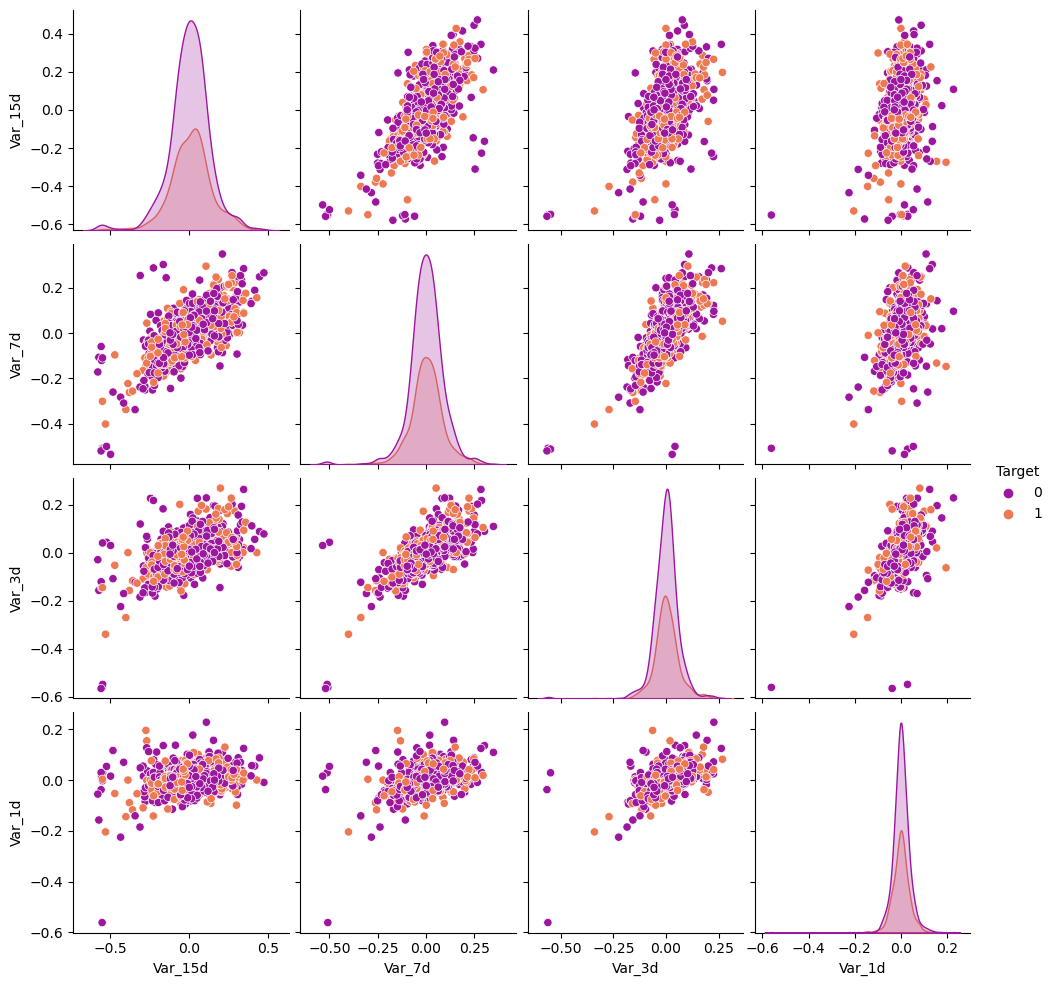

In [19]:
variables = ['Target','Var_15d','Var_7d','Var_3d','Var_1d']
plt.figure(dpi = 120)
sns.pairplot(df[variables],
             hue = 'Target',
             palette = 'plasma')
plt.show()

<Figure size 768x576 with 0 Axes>

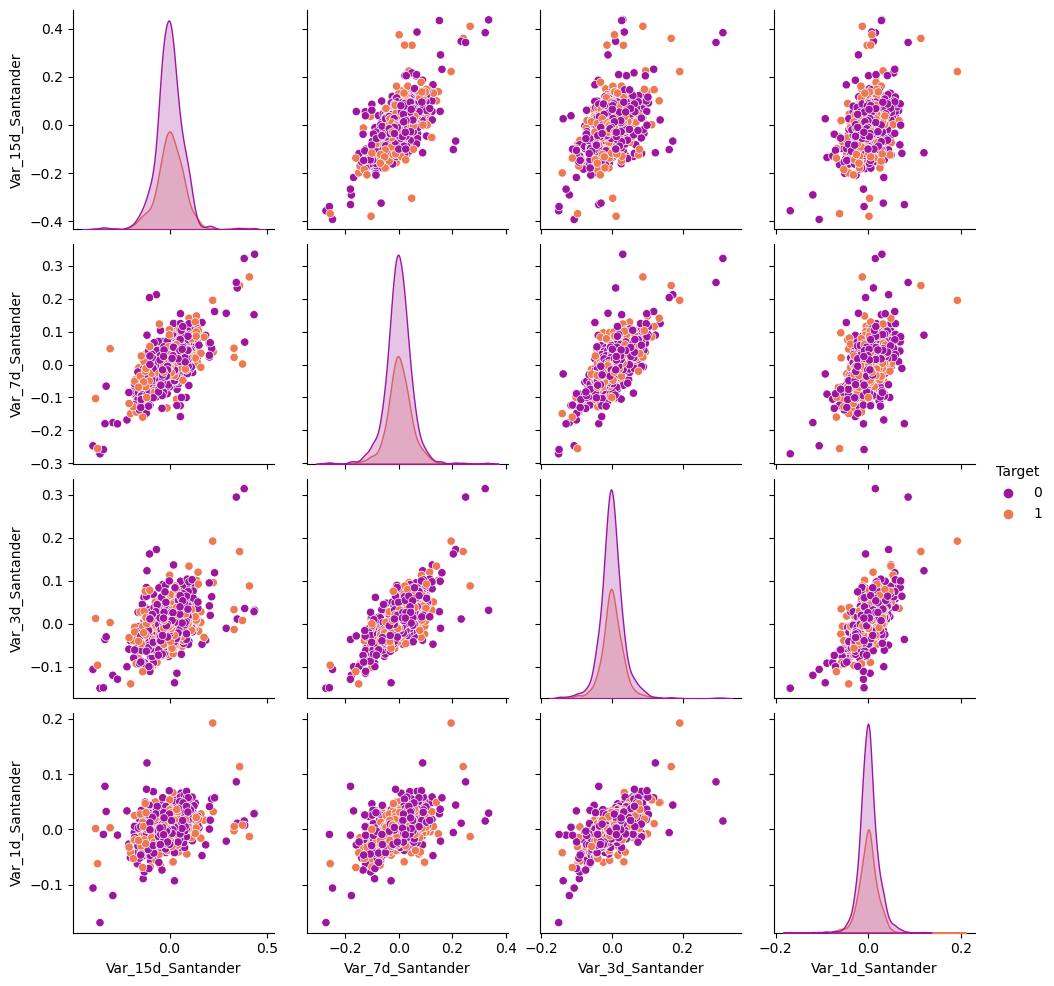

In [20]:
variables = ['Target','Var_15d_Santander','Var_7d_Santander','Var_3d_Santander','Var_1d_Santander']
plt.figure(dpi = 120)
sns.pairplot(df[variables],
             hue = 'Target',
             palette = 'plasma')
plt.show()

<Figure size 768x576 with 0 Axes>

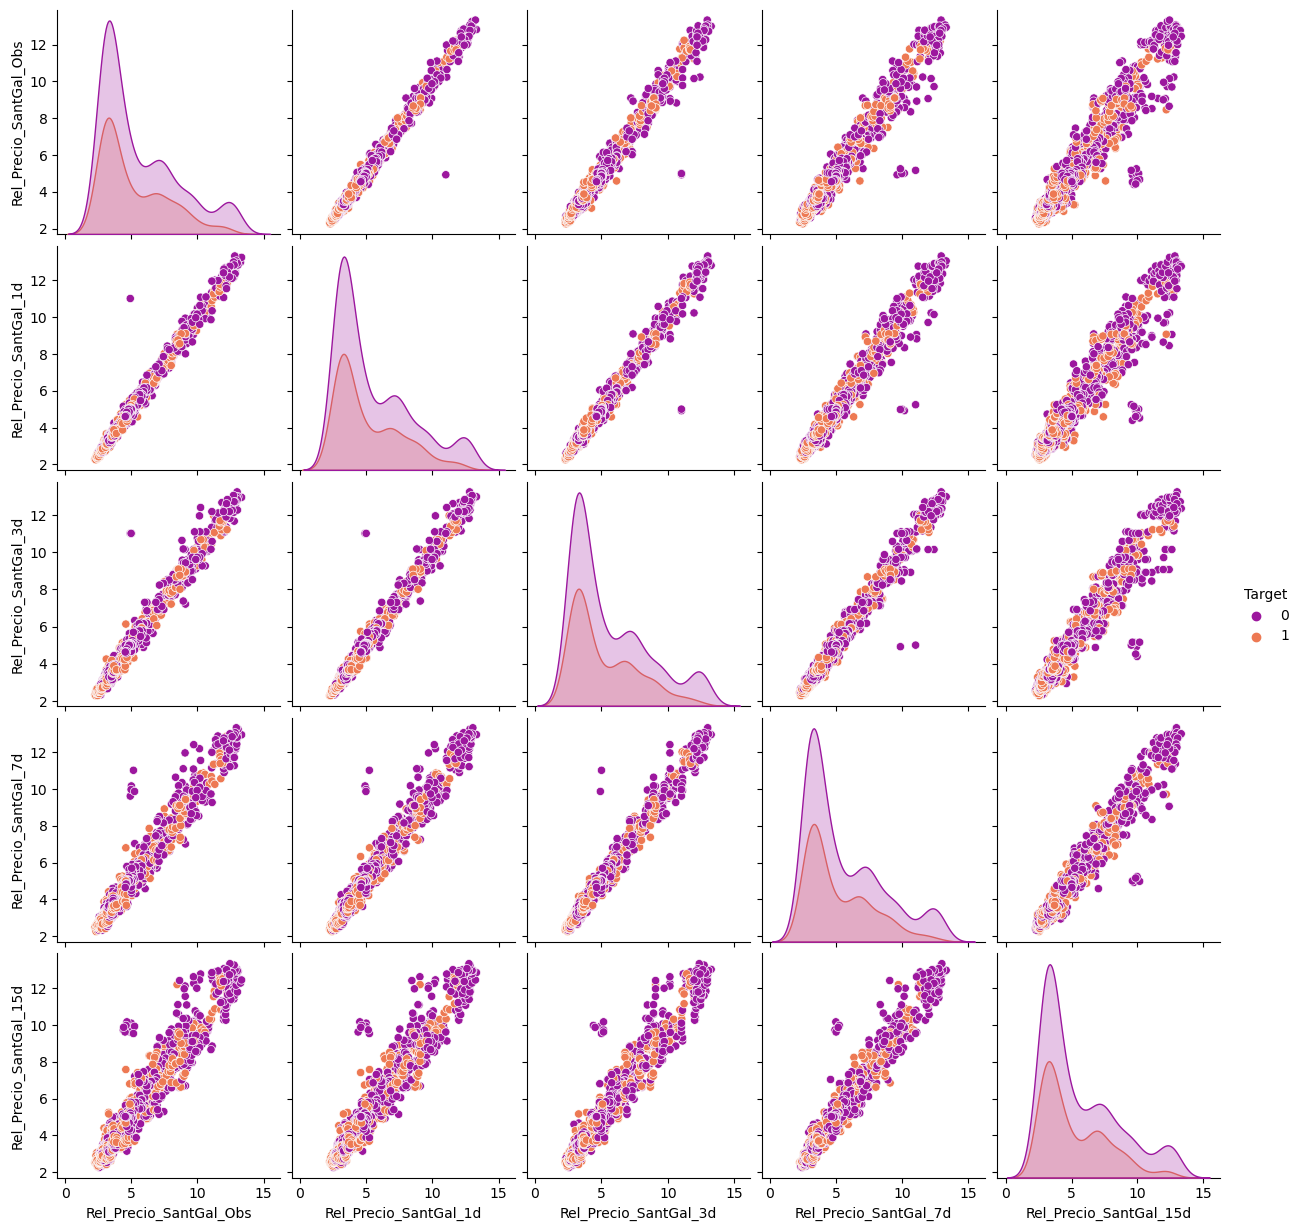

In [21]:
variables = ['Target','Rel_Precio_SantGal_Obs',
       'Rel_Precio_SantGal_1d', 'Rel_Precio_SantGal_3d',
       'Rel_Precio_SantGal_7d', 'Rel_Precio_SantGal_15d']
plt.figure(dpi = 120)
sns.pairplot(df[variables],
             hue = 'Target',
             palette = 'plasma')
plt.show()

<Figure size 768x576 with 0 Axes>

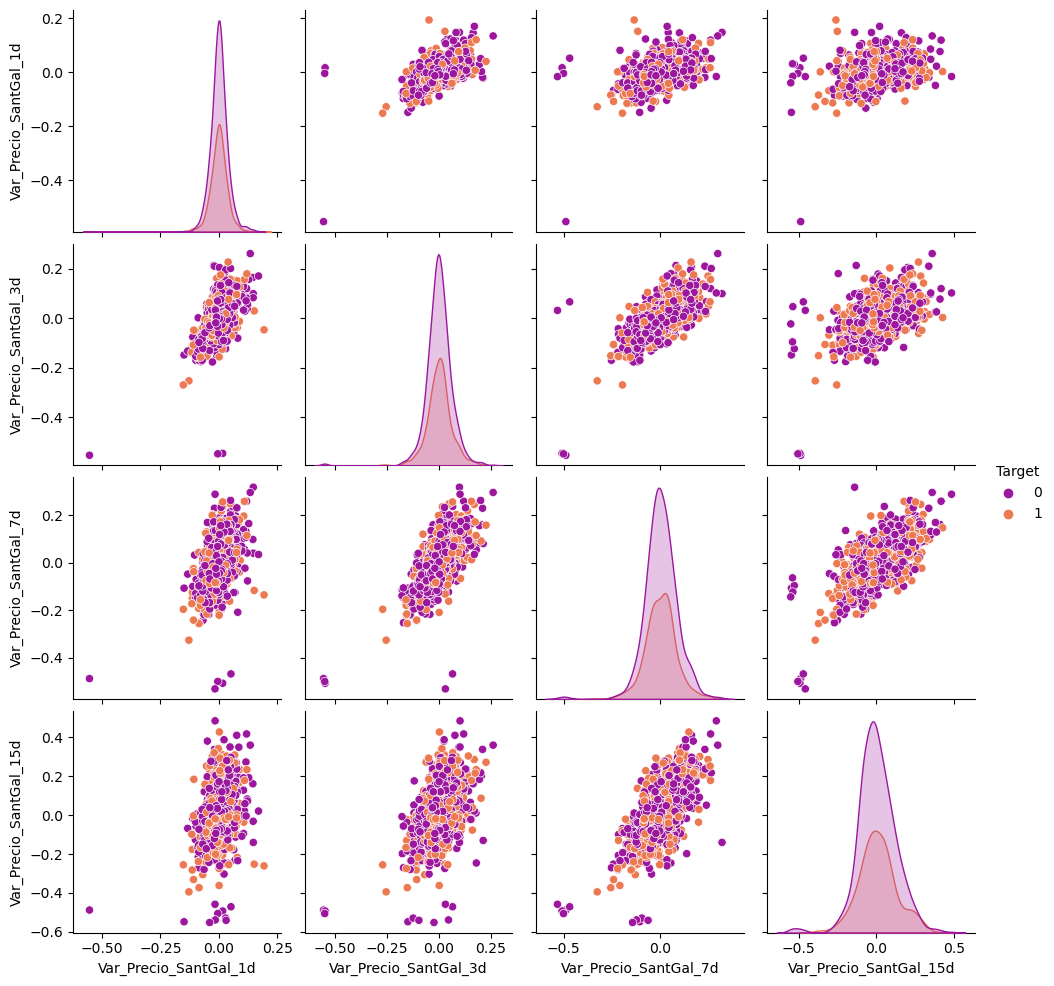

In [22]:
variables = ['Target','Var_Precio_SantGal_1d', 'Var_Precio_SantGal_3d',
       'Var_Precio_SantGal_7d', 'Var_Precio_SantGal_15d']
plt.figure(dpi = 120)
sns.pairplot(df[variables],
             hue = 'Target',
             palette = 'plasma')
plt.show()

## ¿Y las variables relacionadas con la fecha de análisis? 


In [23]:
pd_crosstab = pd.crosstab(df["Trimestre"], df["Dia_5"],
                         values = df['Target'], 
                          aggfunc = 'mean')
pd_crosstab

Dia_5,1 - 5,6 - 10,11 - 15,16 - 20,21 - 25,26 - 31
Trimestre,,,,,,
Trimestre 1,0.323529,0.461538,0.333333,0.257576,0.263889,0.217391
Trimestre 2,0.459459,0.388889,0.232877,0.164384,0.304348,0.486486
Trimestre 3,0.410959,0.200000,0.210526,0.422535,0.414286,0.432432
Trimestre 4,0.269841,0.218750,0.375000,0.444444,0.372881,0.478873


<Axes: xlabel='Dia_5', ylabel='Trimestre'>

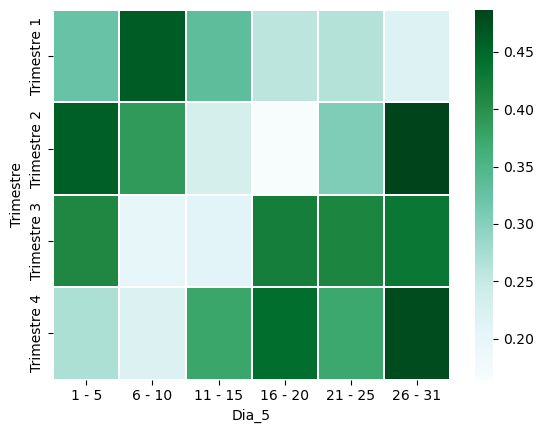

In [24]:
sns.heatmap(pd_crosstab,
           linewidths=0.3,
           cmap="BuGn")

In [25]:
agrupacion_momento_anio = df.groupby(['Trimestre','Dia_5']).agg(      
    Tasa_Exito = ('Target', 'mean')
).reset_index()

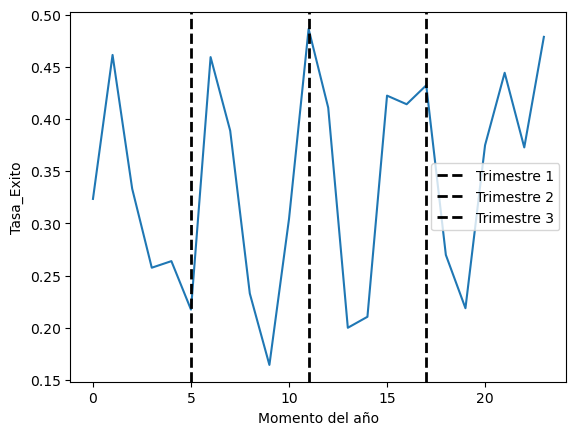

In [26]:
plt.figure()
sns.lineplot(data = agrupacion_momento_anio,
             y = 'Tasa_Exito',
             x = agrupacion_momento_anio.index)
plt.xlabel('Momento del año')

plt.axvline(x = 5, 
            color = 'black', 
            linestyle = '--', 
            label = 'Trimestre 1',
            linewidth = 2)

plt.axvline(x = 11, 
            color = 'black', 
            linestyle = '--', 
            label = 'Trimestre 2',
            linewidth = 2)

plt.axvline(x = 17, 
            color = 'black', 
            linestyle = '--', 
            label = 'Trimestre 3',
            linewidth = 2)

plt.legend()

Text(0.5, 1.0, 'Tasa de aumento según momento de la Semana')

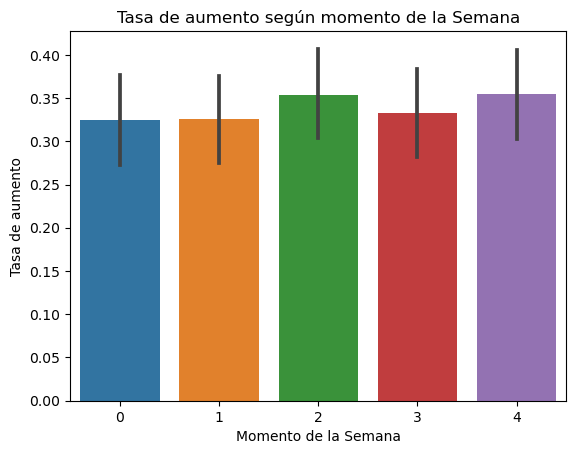

In [27]:
# Momento de la semana
sns.barplot(data = df,
                x = 'Dia_Semana',
                y = 'Target')
plt.xlabel('Momento de la Semana')
plt.ylabel('Tasa de aumento')
plt.title('Tasa de aumento según momento de la Semana')

Text(0.5, 1.0, 'Tasa de aumento según momento del mes')

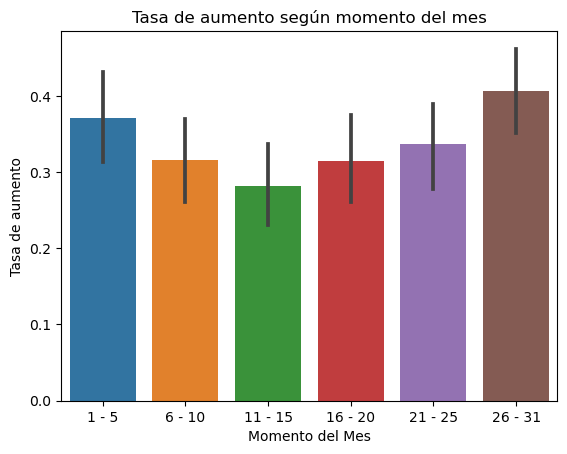

In [28]:
# Momento del mes
sns.barplot(data = df,
                x = 'Dia_5',
                y = 'Target')
plt.xlabel('Momento del Mes')
plt.ylabel('Tasa de aumento')
plt.title('Tasa de aumento según momento del mes')

Text(0.5, 1.0, 'Tasa de aumento según momento del Año')

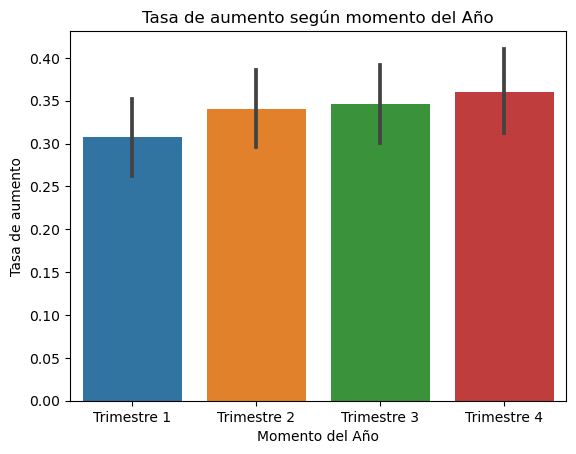

In [29]:
# Momento del año
sns.barplot(data = df,
                x = 'Trimestre',
                y = 'Target')
plt.xlabel('Momento del Año')
plt.ylabel('Tasa de aumento')
plt.title('Tasa de aumento según momento del Año')

Text(0.5, 1.0, 'Distribución de Rel_Precio_SantGal_15d')

<Figure size 640x480 with 0 Axes>

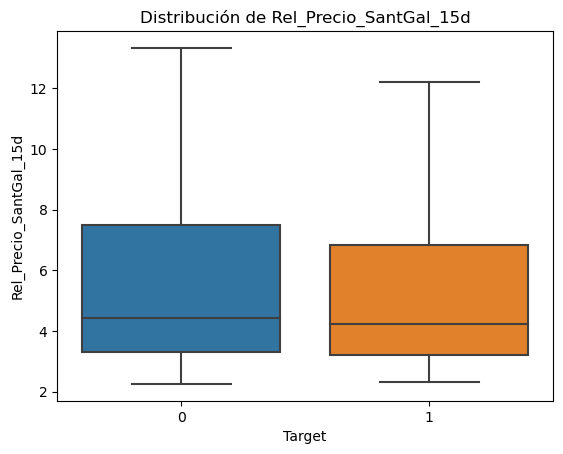

In [30]:
plt.figure()
# Histograma
plt.figure()
sns.boxplot(data = df,
            x = 'Target',
            y = 'Rel_Precio_SantGal_15d', 
            showfliers = False)
plt.title('Distribución de Rel_Precio_SantGal_15d')

# Probemos algunos árboles de decisión 

[Text(0.4, 0.9, 'node #0\nVar_1d <= -0.034\nsamples = 100.0%\nvalue = [0.662, 0.338]'),
 Text(0.3, 0.7, 'node #1\nsamples = 13.2%\nvalue = [0.587, 0.413]'),
 Text(0.5, 0.7, 'node #2\nVar_15d <= 0.015\nsamples = 86.8%\nvalue = [0.673, 0.327]'),
 Text(0.3, 0.5, 'node #3\nVar_15d <= -0.029\nsamples = 43.1%\nvalue = [0.697, 0.303]'),
 Text(0.2, 0.3, 'node #4\nVar_7d <= -0.037\nsamples = 28.6%\nvalue = [0.662, 0.338]'),
 Text(0.1, 0.1, 'node #5\nsamples = 14.4%\nvalue = [0.7, 0.3]'),
 Text(0.3, 0.1, 'node #6\nsamples = 14.2%\nvalue = [0.624, 0.376]'),
 Text(0.4, 0.3, 'node #7\nsamples = 14.5%\nvalue = [0.766, 0.234]'),
 Text(0.7, 0.5, 'node #8\nVar_15d <= 0.052\nsamples = 43.7%\nvalue = [0.649, 0.351]'),
 Text(0.6, 0.3, 'node #9\nsamples = 12.2%\nvalue = [0.609, 0.391]'),
 Text(0.8, 0.3, 'node #10\nVar_15d <= 0.095\nsamples = 31.5%\nvalue = [0.665, 0.335]'),
 Text(0.7, 0.1, 'node #11\nsamples = 14.3%\nvalue = [0.698, 0.302]'),
 Text(0.9, 0.1, 'node #12\nsamples = 17.2%\nvalue = [0.637, 0.36

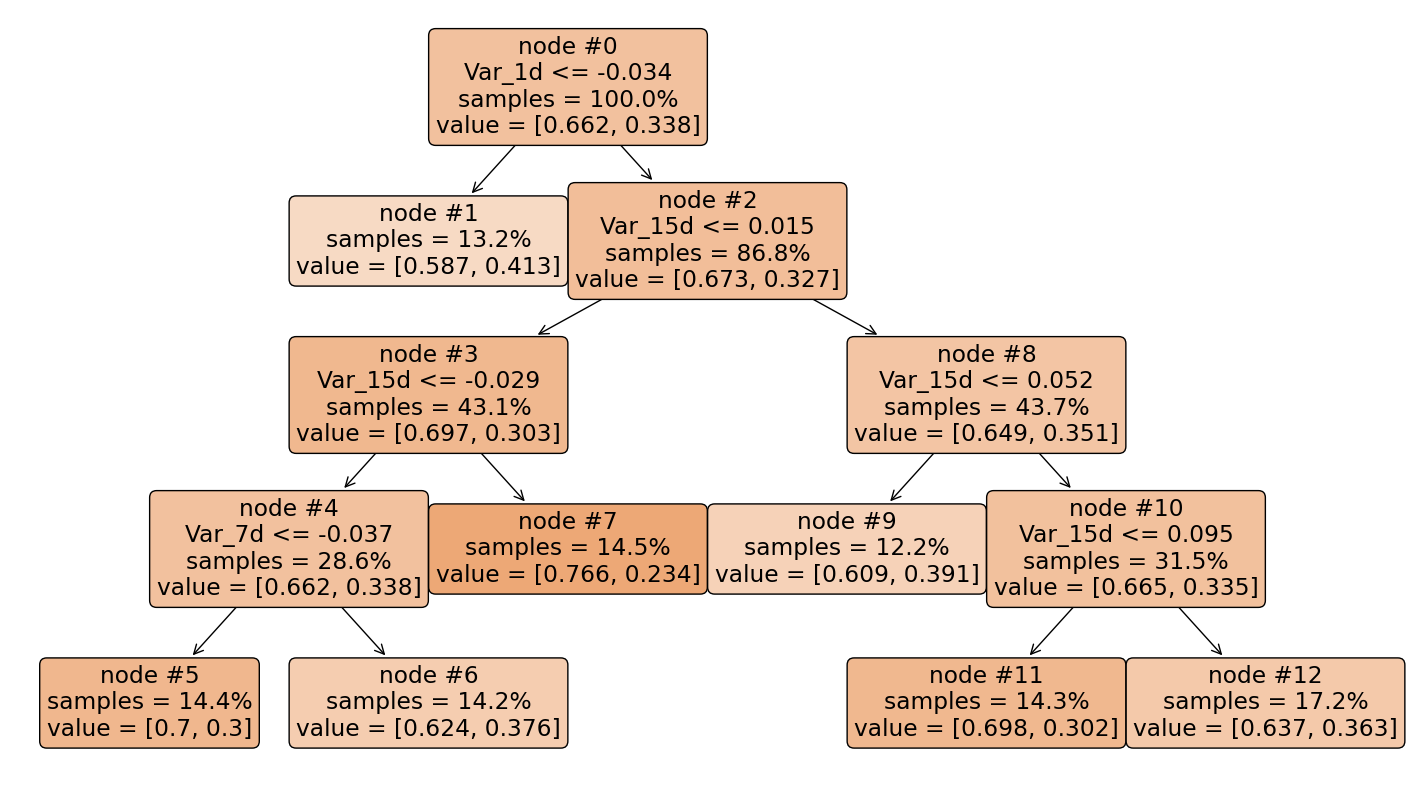

In [31]:
# Los enlisto: 
lista_predictores = ['Var_15d','Var_7d','Var_1d']

# Los transformo en matriz: 
X = df[lista_predictores].values

# Genero vector de target
y = df['Target'].values

# Genero modelo: árbol de decisión 
clf = DecisionTreeClassifier(random_state = 1234, # Semilla aleatoria
                             criterion = 'gini', # Funcion para medir calidad de la división
                             splitter = 'best', # Estrategia para elegir la división de cada nodo
                             max_depth = 4, # Profundidad máxima del árbol
                             min_samples_leaf = 200 # Mínima cantidad de registros por nodo final
                            )
clf.feature_names = lista_predictores
model = clf.fit(X, y)

plt.figure(figsize=(18, 10))
plot_tree(clf, 
          filled = True, 
          rounded = True, 
          feature_names = lista_predictores, 
          impurity = False,
          proportion = True,
          node_ids = True)

In [32]:
# Genero predicciones  
df['Predict_Arbol_Nodo'] = clf.apply(df[lista_predictores])
df['Predict_Arbol_Nodo'].value_counts()

C:\Users\usernosis\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


12    284
7     239
5     237
11    235
6     234
1     218
9     202
Name: Predict_Arbol_Nodo, dtype: int64

In [33]:
# Groupby por prediccion de nodo: 
resultados_nodo = df.groupby('Predict_Arbol_Nodo').agg( 
    MIN_Var_15d = ('Var_15d', 'min'),
    MAX_Var_15d = ('Var_15d', 'max'),
    MIN_Var_7d = ('Var_7d', 'min'),
    MAX_Var_7d = ('Var_7d', 'max'),
    MIN_Var_1d = ('Var_1d', 'min'),
    MAX_Var_1d = ('Var_1d', 'max'),
    Cant = ('Predict_Arbol_Nodo', 'count'),      
    Tasa_Exito = ('Target', 'mean')    
).reset_index()
resultados_nodo.sort_values(by = 'Tasa_Exito', ascending = False)

,Predict_Arbol_Nodo,MIN_Var_15d,MAX_Var_15d,MIN_Var_7d,MAX_Var_7d,MIN_Var_1d,MAX_Var_1d,Cant,Tasa_Exito
0,1,-0.579685,0.305031,-0.519977,0.200292,-0.561174,-0.033774,218,0.412844
4,9,0.015476,0.051758,-0.103049,0.171913,-0.030702,0.177066,202,0.391089
2,6,-0.311031,-0.029299,-0.036806,0.301807,-0.033416,0.137246,234,0.376068
6,12,0.094883,0.472175,-0.096665,0.348183,-0.033417,0.227766,284,0.362676
5,11,0.051813,0.094470,-0.095128,0.233189,-0.033457,0.100821,235,0.302128
1,5,-0.558607,-0.030453,-0.535237,-0.037123,-0.033727,0.195537,237,0.299578
3,7,-0.028986,0.015133,-0.107620,0.143623,-0.031907,0.101560,239,0.234310


[Text(0.6, 0.9, 'node #0\nRel_Precio_SantGal_15d <= 9.089\nsamples = 100.0%\nvalue = [0.662, 0.338]'),
 Text(0.4, 0.7, 'node #1\nRel_Precio_SantGal_7d <= 3.161\nsamples = 87.7%\nvalue = [0.642, 0.358]'),
 Text(0.2, 0.5, 'node #2\nsamples = 21.0%\nvalue = [0.679, 0.321]'),
 Text(0.6, 0.5, 'node #3\nRel_Precio_SantGal_7d <= 6.91\nsamples = 66.7%\nvalue = [0.631, 0.369]'),
 Text(0.4, 0.3, 'node #4\nRel_Precio_SantGal_7d <= 5.021\nsamples = 50.8%\nvalue = [0.617, 0.383]'),
 Text(0.2, 0.1, 'node #5\nsamples = 36.8%\nvalue = [0.644, 0.356]'),
 Text(0.6, 0.1, 'node #6\nsamples = 14.0%\nvalue = [0.545, 0.455]'),
 Text(0.8, 0.3, 'node #7\nsamples = 15.9%\nvalue = [0.676, 0.324]'),
 Text(0.8, 0.7, 'node #8\nsamples = 12.3%\nvalue = [0.798, 0.202]')]

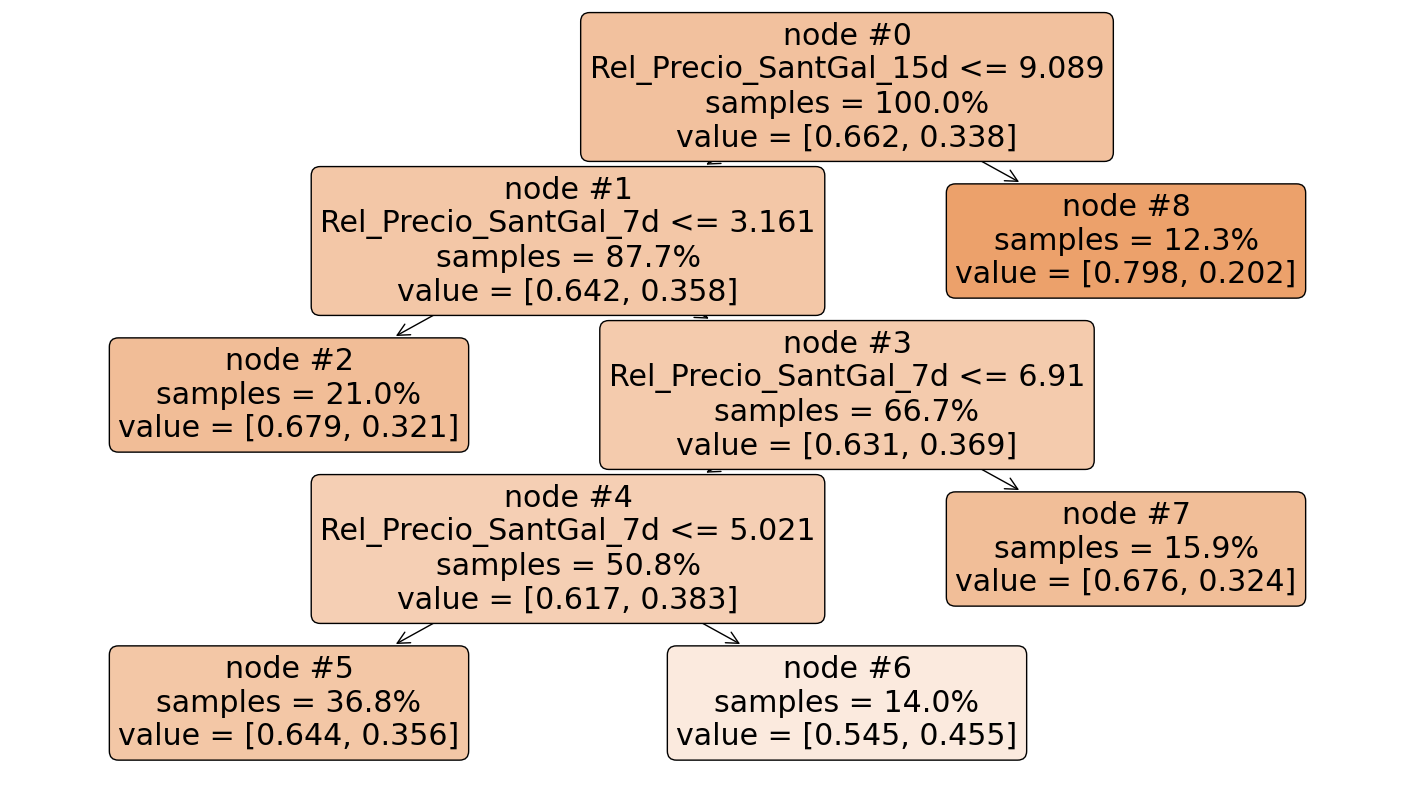

In [34]:
# Los enlisto: 
lista_predictores = ['Rel_Precio_SantGal_7d', 'Rel_Precio_SantGal_15d']

# Los transformo en matriz: 
X = df[lista_predictores].values

# Genero vector de target
y = df['Target'].values

# Genero modelo: árbol de decisión 
clf = DecisionTreeClassifier(random_state = 1, # Semilla aleatoria
                             criterion = 'gini', # Funcion para medir calidad de la división
                             splitter = 'best', # Estrategia para elegir la división de cada nodo
                             max_depth = 4, # Profundidad máxima del árbol
                             min_samples_leaf = 200 # Mínima cantidad de registros por nodo final
                            )
clf.feature_names = lista_predictores
model = clf.fit(X, y)

plt.figure(figsize=(18, 10))
plot_tree(clf, 
          filled = True, 
          rounded = True, 
          feature_names = lista_predictores, 
          impurity = False,
          proportion = True,
          node_ids = True)

In [35]:
# Genero predicciones  
df['Predict_Arbol_Nodo_2'] = clf.apply(df[lista_predictores])
df['Predict_Arbol_Nodo_2'].value_counts()

C:\Users\usernosis\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


5    607
2    346
7    262
6    231
8    203
Name: Predict_Arbol_Nodo_2, dtype: int64

In [36]:
# Groupby por prediccion de nodo: 
resultados_nodo = df.groupby('Predict_Arbol_Nodo_2').agg(     
    Cant = ('Predict_Arbol_Nodo_2', 'count'),       
    Tasa_Exito = ('Target', 'mean'),
    MIN_Rel_Precio_SantGal_15d = ('Rel_Precio_SantGal_15d', 'min'),
    MAX_Rel_Precio_SantGal_15d = ('Rel_Precio_SantGal_15d', 'max'),
    MIN_Rel_Precio_SantGal_7d = ('Rel_Precio_SantGal_7d', 'min'),
    MAX_Rel_Precio_SantGal_7d = ('Rel_Precio_SantGal_7d', 'max')
).reset_index()
resultados_nodo.sort_values(by = 'Tasa_Exito', ascending = False)

,Predict_Arbol_Nodo_2,Cant,Tasa_Exito,MIN_Rel_Precio_SantGal_15d,MAX_Rel_Precio_SantGal_15d,MIN_Rel_Precio_SantGal_7d,MAX_Rel_Precio_SantGal_7d
2,6,231,0.454545,4.209525,8.238576,5.021878,6.904607
1,5,607,0.355848,2.416955,7.036436,3.162500,5.019434
3,7,262,0.324427,5.693232,9.083078,6.915804,10.097741
0,2,346,0.320809,2.257364,4.351761,2.257364,3.160228
4,8,203,0.201970,9.094975,13.330769,4.922760,13.330769


<Axes: xlabel='Rel_Precio_SantGal_15d', ylabel='Rel_Precio_SantGal_7d'>

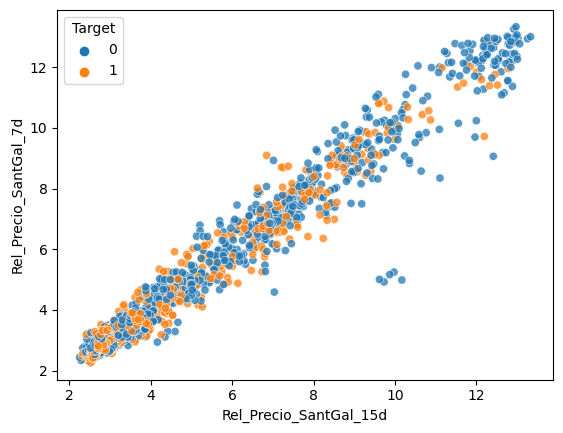

In [37]:
# Graficamente 
g1 = plt.figure()
sns.scatterplot(data = df,
                x = 'Rel_Precio_SantGal_15d',
                y = 'Rel_Precio_SantGal_7d',  
                alpha = 0.75,
                hue = 'Target')

# Preprocesamiento para modelar

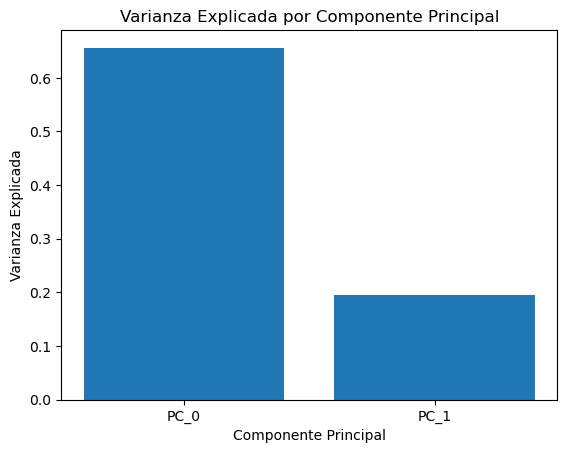

In [38]:
# PCA 
variables_relacionadas = ['Var_Precio_SantGal_1d', 'Var_Precio_SantGal_3d',
       'Var_Precio_SantGal_7d', 'Var_Precio_SantGal_15d']
df_PCA = df[variables_relacionadas]

# Extraer la matriz de características
scaler = StandardScaler()
X = df_PCA.values
X = scaler.fit_transform(X)
# Crear un objeto PCA
pca = PCA(n_components = 2)
# Ajustar el modelo PCA a los datos
pca.fit(X)
# Obtener las componentes principales
componentes_principales = pca.transform(X)
# Crear un nuevo DataFrame con las componentes principales
df_PCA_final = pd.DataFrame(data = componentes_principales)
prefijo = "PC_"
df_PCA_final = df_PCA_final.add_prefix(prefijo)

# Visualizar la varianza explicada por cada componente principal en un gráfico de barras
varianza_explicada = pca.explained_variance_ratio_
componentes = df_PCA_final.columns

plt.bar(componentes, 
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

In [39]:
# Me llevo los componentes al dataframe
df = pd.concat([df, df_PCA_final], axis=1) 

In [40]:
# Logaritmos 
df['Close_Obs_LOG'] = np.log(df['Close_Obs'])
df['Open_Obs_LOG'] = np.log(df['Open_Obs'])

In [41]:
# One hot encoding 
df['Principio_Mes'] = np.where(df['Dia'] < 6,1,0)
df['Fin_Mes'] = np.where(df['Dia'] > 25,1,0)
df['Fin_Year'] = np.where(df['Mes'] > 8,1,0)
df['Var_15d_15pct'] = np.where(df['Var_15d'] > 0.15,1,0)

In [42]:
# Target encoding 
# Primero separo ya en train y test 
df_train = df.loc[df['Date_Obs'] < '2022-01-01',]
df_test = df.loc[df['Date_Obs'] >= '2022-01-01',]

# Tabla para matchear del arbol 1
resultados_1 = df_train.groupby('Predict_Arbol_Nodo').agg(     
    Cant = ('Predict_Arbol_Nodo', 'count'),       
    Tasa_Arbol1 = ('Target', 'mean')
).reset_index()

# Matcheo 
df_train = df_train.merge(resultados_1[['Predict_Arbol_Nodo','Tasa_Arbol1']],
              left_on = 'Predict_Arbol_Nodo',
              right_on = 'Predict_Arbol_Nodo',
              how = 'left')
df_test = df_test.merge(resultados_1[['Predict_Arbol_Nodo','Tasa_Arbol1']],
              left_on = 'Predict_Arbol_Nodo',
              right_on = 'Predict_Arbol_Nodo',
              how = 'left')

# Tabla para matchear del arbol 2
resultados_2 = df_train.groupby('Predict_Arbol_Nodo_2').agg(     
    Cant = ('Predict_Arbol_Nodo_2', 'count'),       
    Tasa_Arbol2 = ('Target', 'mean')
).reset_index()

df_train = df_train.merge(resultados_2[['Predict_Arbol_Nodo_2','Tasa_Arbol2']],
              left_on = 'Predict_Arbol_Nodo_2',
              right_on = 'Predict_Arbol_Nodo_2',
              how = 'left')
df_test = df_test.merge(resultados_2[['Predict_Arbol_Nodo_2','Tasa_Arbol2']],
              left_on = 'Predict_Arbol_Nodo_2',
              right_on = 'Predict_Arbol_Nodo_2',
              how = 'left')


In [43]:
resultados_1.sort_values(by = 'Tasa_Arbol1')

,Predict_Arbol_Nodo,Cant,Tasa_Arbol1
3,7,186,0.231183
1,5,179,0.290503
6,12,212,0.344340
2,6,161,0.354037
5,11,175,0.365714
4,9,139,0.402878
0,1,169,0.420118


In [44]:
resultados_2.sort_values(by = 'Tasa_Arbol2')

,Predict_Arbol_Nodo_2,Cant,Tasa_Arbol2
4,8,203,0.201970
3,7,262,0.324427
1,5,354,0.350282
0,2,187,0.352941
2,6,215,0.465116


In [45]:
df.head()

,index,Date_Target,Close_Target,Date_Obs,Close_Obs,Open_Obs,Target,Date_15dAntes,Close_15dAntes,Var_15d,...,Predict_Arbol_Nodo,Predict_Arbol_Nodo_2,PC_0,PC_1,Close_Obs_LOG,Open_Obs_LOG,Principio_Mes,Fin_Mes,Fin_Year,Var_15d_15pct
0,0,2017-03-01,32.910000,2017-02-22,34.820000,34.700001,0,2017-02-07,33.220001,0.048164,...,9,7,-0.676636,-0.165013,3.550192,3.546740,0,0,0,0
1,1,2017-03-02,32.570000,2017-02-23,33.599998,35.000000,0,2017-02-08,34.419998,-0.023823,...,1,7,0.800489,0.557732,3.514526,3.555348,0,0,0,0
2,2,2017-03-03,33.619999,2017-02-24,32.570000,33.299999,1,2017-02-09,35.299999,-0.077337,...,5,7,1.056776,-0.023512,3.483392,3.505557,0,0,0,0
3,3,2017-03-06,33.200001,2017-02-27,32.299999,32.400002,0,2017-02-12,35.669998,-0.094477,...,5,7,0.930028,-0.445259,3.475067,3.478158,0,1,0,0
4,4,2017-03-07,33.000000,2017-02-28,31.799999,32.110001,1,2017-02-13,34.490002,-0.077994,...,5,7,1.624908,0.108714,3.459466,3.469168,0,1,0,0


# Modelo 1

In [46]:
formula = "Target ~ Principio_Mes + Fin_Mes + Fin_Year + PC_0 + Tasa_Arbol1 + Tasa_Arbol2"
reg_log_1 = smf.logit(formula, data = df_train).fit()

# Ver el resumen de resultados
print(reg_log_1.summary())

Optimization terminated successfully.
         Current function value: 0.611913
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1221
Model:                          Logit   Df Residuals:                     1214
Method:                           MLE   Df Model:                            6
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                 0.04612
Time:                        21:25:00   Log-Likelihood:                -747.15
converged:                       True   LL-Null:                       -783.27
Covariance Type:            nonrobust   LLR p-value:                 1.408e-13
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.9588      0.477     -8.295      0.000      -4.894      -3.023
Principio_Mes     0.

In [47]:
# Predicciones 
df_train['Predict_Prob_RegLog_1'] = reg_log_1.predict(df_train)
df_test['Predict_Prob_RegLog_1'] = reg_log_1.predict(df_test)

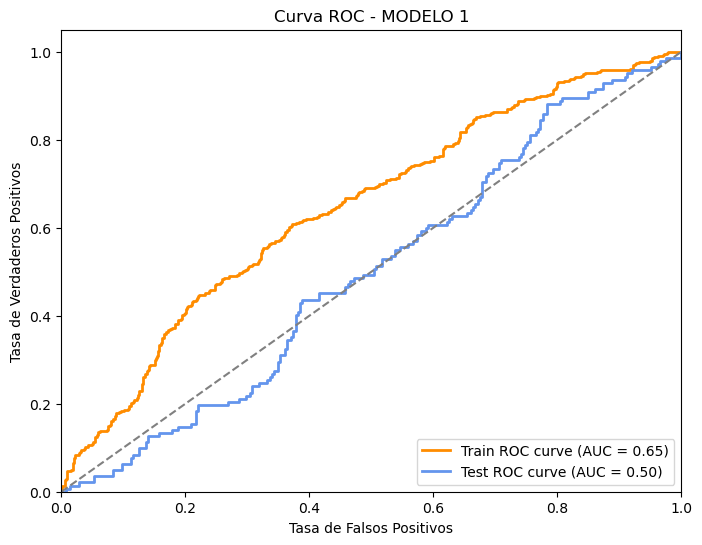

In [48]:
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba
y_train = df_train['Target']
y_train_proba = df_train['Predict_Prob_RegLog_1']
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = df_test['Target']
y_test_proba = df_test['Predict_Prob_RegLog_1'] 
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MODELO 1')
plt.legend(loc='lower right')
plt.show()

# Modelo 2

In [49]:
features_base = ['Principio_Mes','Fin_Mes','Fin_Year','PC_0','Tasa_Arbol1',
                 'Tasa_Arbol2','Var_15d_15pct','Close_Obs_LOG',
                 'Rel_Precio_SantGal_3d','Mes','Var_7d_Santander']
model_formula = 'Target ~ ' + ' + '.join(df_train[features_base].columns)

reg_log_2 = smf.logit(model_formula, data = df_train).fit()

# Ver el resumen de resultados
print(reg_log_2.summary())

Optimization terminated successfully.
         Current function value: 0.609708
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1221
Model:                          Logit   Df Residuals:                     1209
Method:                           MLE   Df Model:                           11
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                 0.04956
Time:                        21:25:02   Log-Likelihood:                -744.45
converged:                       True   LL-Null:                       -783.27
Covariance Type:            nonrobust   LLR p-value:                 4.211e-12
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.3136      0.646     -6.675      0.000      -5.580      -3.

In [50]:
features_base = ['Var_15d','Var_15d_Santander','Var_7d','Var_7d_Santander','Var_3d',
                 'Var_3d_Santander', 'Rel_Precio_SantGal_Obs', 'Rel_Precio_SantGal_3d',
                 'Rel_Precio_SantGal_7d', 'Rel_Precio_SantGal_15d',
                 'Var_Precio_SantGal_7d', 'Var_Precio_SantGal_15d',
                'Principio_Mes','Fin_Mes','Fin_Year','Mes','Dia',
                 'PC_0','PC_1',
                'Close_Obs_LOG','Open_Obs_LOG',
                 'Tasa_Arbol1',
                 'Tasa_Arbol2']
X = df_train[features_base].values
y = df_train['Target']

rf_1 = RandomForestClassifier(n_estimators = 100, 
                               random_state = 123,
                               max_depth = 5,
                               min_samples_leaf = 150,
                               max_features = 4,
                               criterion = 'entropy') 

# Entrenar el modelo
rf_1.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=4,
                       min_samples_leaf=150, random_state=123)

In [51]:
# Predicciones 
df_train['Predict_Prob_RF_2'] = rf_1.predict_proba(df_train[features_base].values)[:,1]
df_test['Predict_Prob_RF_2'] = rf_1.predict_proba(df_test[features_base].values)[:,1]

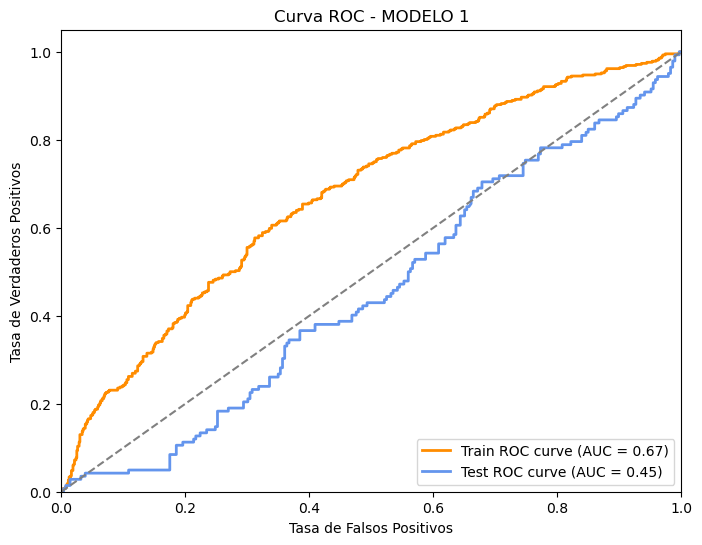

In [52]:
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba
y_train = df_train['Target']
y_train_proba = df_train['Predict_Prob_RF_2']
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = df_test['Target']
y_test_proba = df_test['Predict_Prob_RF_2'] 
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MODELO 2')
plt.legend(loc='lower right')
plt.show()